# Assignment 5
### Do all four questions.

**1.** Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [108]:
import numpy as np

A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [109]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

A@e_1

array([1, 4, 7])

The first column gets selected because the dot product of each row of the matrix is just the 1st number. To multiply matrices you need to get the dot product of each row by multiplying the 1st element of that row with the first element/row of the e_1 array. For example the first row is 1(1) + 2(0) + 3(0) = 1. 

In [110]:
A@e_2

array([2, 5, 8])

The second column gets selected, this time because the 1 in the array is the in the second row. 

In [111]:
A@e_3

array([3, 6, 9])

The third column gets selected, this time because the 1 in the array is the in the third row. 

b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [112]:
u = np.ones(3)
A@u

array([ 6., 15., 24.])

This results in the sum of all the columns since each row element is multiplied by one and added with each other. 

c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [113]:
A = np.array([ [1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])

A@x


array([-2,  4, 11])

Multiplying A with x gives you the same exact array as x. 

d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [114]:
A = np.array([ [0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])

A@x


array([11, -2,  4])

The 1s end up choosing which value shows up through the dot product. So the first element 11 shows up because it's (-2)(0) + (4)(0) + (11)(1) = 11. Then second element -2 is chosen (since the 1 is in the 1st spot), then third 4 is chosen (since 1 is in the second spot).

In [115]:
B = np.array([[0, 1, 0],
              [1, 0, 0],
              [0, 0, 1]])

B@x

array([ 4, -2, 11])

Second element gets picked for the 1st row, 1st element gets picked for the 2nd row, 3rd element gets picked for the third row.

e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [116]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1
print(A)

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]


In [117]:
print(A@e_1)

[0.50052958 0.02574731 0.47372311]


This is selecting the first column like in the previous problem. 

In [118]:
print(A@e_2)

[0.24049286 0.39251588 0.36699127]


This is selecting the second column.

In [119]:
print(A@e_3)

[0.18358131 0.37907577 0.43734292]


This is selcting the third column.

f. For each of the vectors $e_1, e_2, e_3$, multiple $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

In [120]:
def vector_mult(A, v):
    for i in range(0,5):
        v = A@v
    return v

vector_mult(A, e_1)

array([0.29266551, 0.27862515, 0.42870935])

In [121]:
vector_mult(A, e_2)

array([0.29197422, 0.27979983, 0.42822595])

In [122]:
vector_mult(A, e_3)

array([0.29171646, 0.2802254 , 0.42805814])

When you multiply A with each vector 5 times, the array gives numbers that are very similar to each other. This means that it is turning into a more standard distrubution.

*2.* Let's consider a simple Markov transition matrix over two states:
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?
- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)
- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?
- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?
- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 


First row: 0.25(1) + 0.5(0) = 0.25
Second row: 0.75(1) + 0.5(0) = 0.75

array = [0.25, 0.75]

In [123]:
T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]])

init_condition  = np.array([1,0])

p_1 = T @ init_condition
p_1

array([0.25, 0.75])

This array is showing that after 1 transition there is a 25% chance of being in state 1 and a 75% of being in state 2.

In [124]:
p_2 = T @ p_1
p_2

array([0.4375, 0.5625])

The array is showing that after 2 transitions there is a 43.75% chance of being in state 1 and a 56.25% chance is being in state 2. It's a forecast of states 2 time periods from now. 

In [125]:
n = 20
p = np.array([1,0])

for i in range(n):
    p = T @ p
    print(f"{i+1}: {p}")

1: [0.25 0.75]
2: [0.4375 0.5625]
3: [0.390625 0.609375]
4: [0.40234375 0.59765625]
5: [0.39941406 0.60058594]
6: [0.40014648 0.59985352]
7: [0.39996338 0.60003662]
8: [0.40000916 0.59999084]
9: [0.39999771 0.60000229]
10: [0.40000057 0.59999943]
11: [0.39999986 0.60000014]
12: [0.40000004 0.59999996]
13: [0.39999999 0.60000001]
14: [0.4 0.6]
15: [0.4 0.6]
16: [0.4 0.6]
17: [0.4 0.6]
18: [0.4 0.6]
19: [0.4 0.6]
20: [0.4 0.6]


It starts settling down after the 5th or 6th transition.

In [126]:
n = 20
p = np.array([0,1])

for i in range(n):
    p = T @ p
    print(f"{i+1}: {p}")

1: [0.5 0.5]
2: [0.375 0.625]
3: [0.40625 0.59375]
4: [0.3984375 0.6015625]
5: [0.40039062 0.59960938]
6: [0.39990234 0.60009766]
7: [0.40002441 0.59997559]
8: [0.3999939 0.6000061]
9: [0.40000153 0.59999847]
10: [0.39999962 0.60000038]
11: [0.4000001 0.5999999]
12: [0.39999998 0.60000002]
13: [0.40000001 0.59999999]
14: [0.4 0.6]
15: [0.4 0.6]
16: [0.4 0.6]
17: [0.4 0.6]
18: [0.4 0.6]
19: [0.4 0.6]
20: [0.4 0.6]


It starts off differently in the first and second transitions but it gets to the same 40% chance state 1 and 60% chance state 2 pattern.

3. Weather data

- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?
- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.
- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?
- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?
- Conditional on being rainy, plot a KDE of the `PRCP` variable.
- Describe one way of making your model better for forecasting and simulation the weather.

Congratulations, you now are a non-parametric meteorologist!

In [ ]:
import pandas as pd

weather = pd.read_csv('cville_weather.csv')

np.int64(399)

In [169]:
weather.isna().sum()

STATION              0
NAME                 0
DATE                 0
DAPR               399
DAPR_ATTRIBUTES    399
MDPR               399
MDPR_ATTRIBUTES    399
PRCP                12
PRCP_ATTRIBUTES     12
SNOW               188
SNOW_ATTRIBUTES    188
SNWD               410
SNWD_ATTRIBUTES    410
dtype: int64

12 rows have missing PRCP data

In [180]:
weather['rain'] = [1 if x > 0 else 0 for x in weather['PRCP']]
weather['rain']

0      1
1      1
2      1
3      1
4      0
      ..
406    0
407    0
408    0
409    0
410    0
Name: rain, Length: 411, dtype: int64

In [128]:
S = 2
tr_counts = np.zeros( (S, S) )

seq = weather['rain'].to_numpy()

for t in range(1,len(seq)):
        x_tm1 = seq[t-1] # previous state
        x_t = seq[t] # current state
        tr_counts[x_t, x_tm1] += 1

print('Transition Counts:\n', tr_counts)

# Sum the transition counts by row:
sums = tr_counts.sum(axis=1, keepdims=True)
print(f'\nState Counts: \n {sums}')

# Sum the transition counts by row:
print(f'\nState proportions: \n {sums/np.sum(sums)}')

# Normalize the transition count matrix to get proportions:
tr_pr = np.divide(tr_counts, sums, 
                            out=np.zeros_like(tr_counts), 
                            where= sums!=0)

col_sums = tr_counts.sum(axis=0, keepdims=True)
T = np.divide(tr_counts, col_sums, out=np.zeros_like(tr_counts), where=col_sums!=0)

print(f'\nTransition matrix T:\n', T)

Transition Counts:
 [[169.  63.]
 [ 62. 116.]]

State Counts: 
 [[232.]
 [178.]]

State proportions: 
 [[0.56585366]
 [0.43414634]]

Transition matrix T:
 [[0.73160173 0.35195531]
 [0.26839827 0.64804469]]


In [129]:
clear_day = np.array([1,0])
rainy_day = np.array([0,1])

T @ clear_day

array([0.73160173, 0.26839827])

There is a 26.84% chance that it's going to rain if it's a clear day yesterday.

In [130]:
T @ rainy_day

array([0.35195531, 0.64804469])

There is a 64.80% chance that it's going to rain if it was a rainy day yesterday.

In [131]:
n = 14

for i in range(n):
    clear_day = T @ clear_day
    print(f"{i+1}: {clear_day}")

1: [0.73160173 0.26839827]
2: [0.62970529 0.37029471]
3: [0.59102067 0.40897933]
4: [0.57633419 0.42366581]
5: [0.57075852 0.42924148]
6: [0.56864174 0.43135826]
7: [0.56783811 0.43216189]
8: [0.56753302 0.43246698]
9: [0.56741719 0.43258281]
10: [0.56737321 0.43262679]
11: [0.56735652 0.43264348]
12: [0.56735018 0.43264982]
13: [0.56734777 0.43265223]
14: [0.56734686 0.43265314]


It takes about 7 days for it to converge to a fixed result when we start with a clear day.

In [132]:
n = 14

for i in range(n):
    rainy_day = T @ rainy_day
    print(f"{i+1}: {rainy_day}")

1: [0.35195531 0.64804469]
2: [0.48557388 0.51442612]
3: [0.5363017 0.4636983]
4: [0.55556033 0.44443967]
5: [0.5628718 0.4371282]
6: [0.56564757 0.43435243]
7: [0.56670139 0.43329861]
8: [0.56710146 0.43289854]
9: [0.56725335 0.43274665]
10: [0.56731101 0.43268899]
11: [0.5673329 0.4326671]
12: [0.56734122 0.43265878]
13: [0.56734437 0.43265563]
14: [0.56734557 0.43265443]


It takes about 8 days for it to converge to a fixed result when we start with a rainy day.

In [145]:
import seaborn as sns

<Axes: xlabel='PRCP', ylabel='Density'>

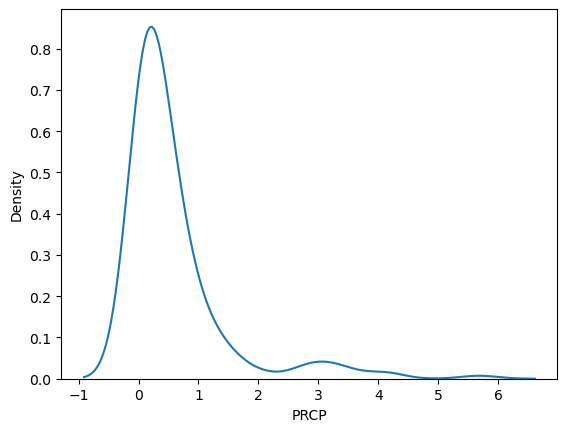

In [144]:
rainy_kde = weather.loc[weather['rain'] == 1, 'PRCP']
sns.kdeplot(rainy_kde)

We can improve the model by making more types of days like drizzling, light rain, heavy rain. This would increase the state space, making the transition matrix more accurate.

4. Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.

- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.
- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?
- Explain why taxicabs are most likely order 1, and not 2 or more.
- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

In [133]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [134]:
with open('taxicab.pkl','rb') as f:
    data = pickle.load(f)

print(len(data))
data[0]

1000


0     Outside Manhattan
0     Outside Manhattan
0     Outside Manhattan
0     Outside Manhattan
0     Outside Manhattan
            ...        
29                 SoHo
29                 SoHo
13    Greenwich Village
3               Chelsea
3               Chelsea
Name: nbhd, Length: 26026, dtype: object

In [135]:
## Extract state space
states = set(data[0])
for i in range(1,len(data)):
    trip_i = set(data[i])
    states = states.union(trip_i)
states = list(states)

## Compute transition counts:
S = len(states)
tr_counts = np.zeros( (S, S) )

# Fix the transition counting (around line where you have the nested loops):
for trip in data:
    seq = np.array(trip)
    for t in range(1,len(seq)):
        # Current and next tokens:
        x_tm1 = seq[t-1] # previous state
        x_t = seq[t] # current state
        # Determine transition indices:
        index_from = states.index(x_tm1)
        index_to = states.index(x_t) #in our state space, where do these indices occur
        # Update transition counts:
        tr_counts[index_to, index_from] += 1

print('Transition Counts:\n', tr_counts)

Transition Counts:
 [[1.39800e+04 5.17700e+03 1.13200e+03 ... 0.00000e+00 0.00000e+00
  1.41000e+02]
 [6.44800e+03 1.38632e+05 4.19800e+03 ... 0.00000e+00 0.00000e+00
  5.50000e+02]
 [2.99500e+03 2.48600e+03 3.91800e+03 ... 0.00000e+00 0.00000e+00
  3.80000e+01]
 ...
 [4.00000e+00 3.00000e+00 1.00000e+00 ... 1.60000e+01 0.00000e+00
  8.00000e+00]
 [2.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 2.00000e+00
  0.00000e+00]
 [1.71000e+02 6.18000e+02 5.20000e+01 ... 4.90000e+01 0.00000e+00
  3.23970e+04]]


In [181]:
# Sum the transitioin counts by row:
sums = tr_counts.sum(axis=0, keepdims=True)
print('State proportions: \n')
print(sums)

# Normalize the transition count matrix to get proportions:
tr_pr = np.divide(tr_counts, sums, 
                             out=np.zeros_like(tr_counts), 
                             where=sums!=0)

State proportions: 

[[1.058700e+05 5.505930e+05 3.859100e+04 3.168450e+05 1.224335e+06
  1.743200e+05 5.102590e+05 1.000000e+00 5.791000e+04 3.603000e+03
  5.017520e+05 3.705730e+05 1.038800e+04 3.701250e+05 2.171460e+05
  1.431100e+04 8.886410e+05 1.112820e+05 2.363902e+06 1.063810e+05
  1.803502e+06 2.797710e+06 7.252200e+04 6.544000e+05 8.393600e+05
  3.000000e+00 4.415730e+05 3.952900e+05 3.851989e+06 2.292350e+05
  1.978286e+06 8.010000e+03 4.086350e+05 8.740570e+05 5.077810e+05
  4.930000e+02 1.200000e+01 1.627100e+05]]


Transition Proportions:

                     Chinatown  SoHo  Little Italy  East Harlem  \
Chinatown                 0.13  0.01          0.03         0.00   
SoHo                      0.06  0.25          0.11         0.00   
Little Italy              0.03  0.00          0.10         0.00   
East Harlem               0.00  0.00          0.00         0.23   
Hell's Kitchen            0.02  0.02          0.03         0.02   
NoHo                      0.02  0.02          0.03         0.00   
Greenwich Village         0.02  0.05          0.03         0.00   
Liberty Island            0.00  0.00          0.00         0.00   
Civic Center              0.02  0.01          0.01         0.00   
Randall's Island          0.00  0.00          0.00         0.00   
Gramercy                  0.02  0.02          0.02         0.01   
Lower East Side           0.10  0.02          0.04         0.00   
Two Bridges               0.00  0.00          0.00         0.00   
Central Park              0.00  0.00 

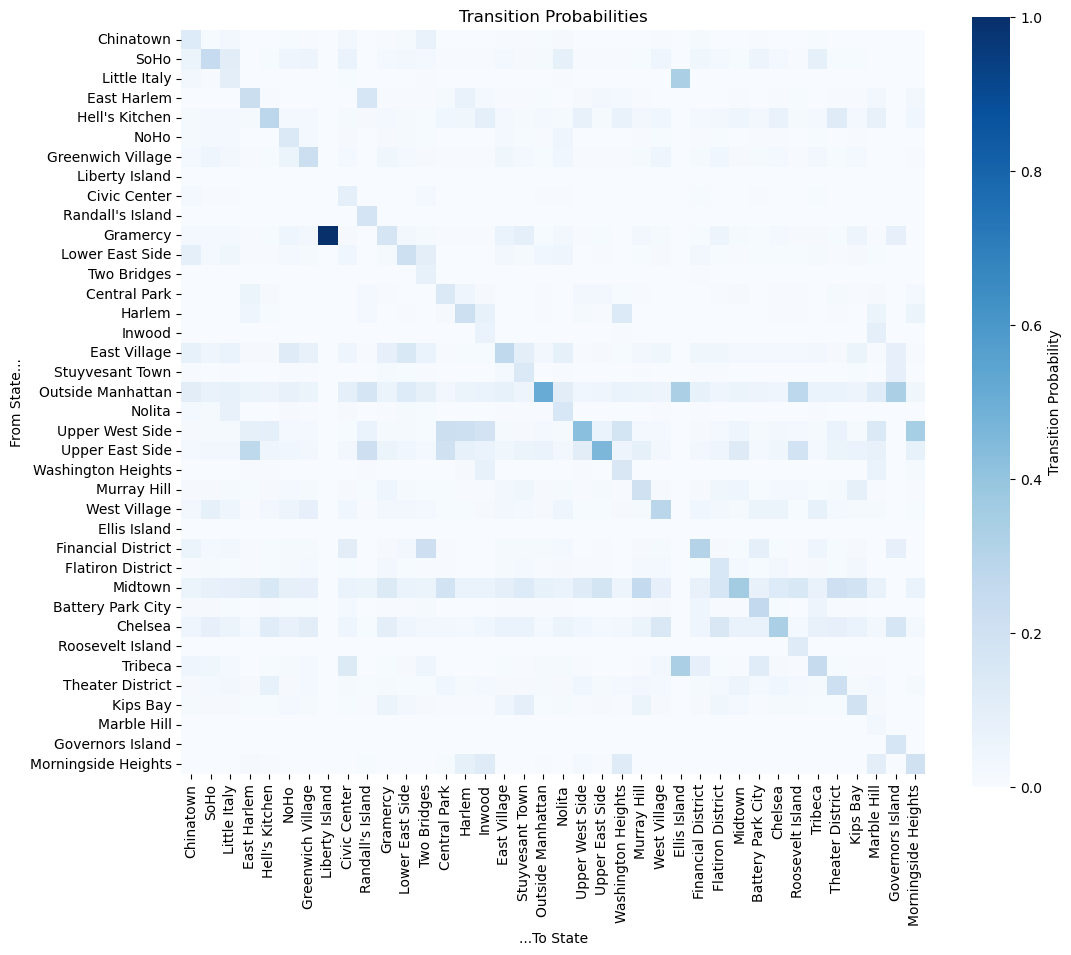

In [182]:
print('Transition Proportions:\n')

tr_df = pd.DataFrame(np.round(tr_pr,2), index=states, columns=states)
print(tr_df)

plt.figure(figsize=(12, 10))
sns.heatmap(tr_pr, 
            cmap='Blues',    
            square=True,          
            xticklabels=states,
            yticklabels=states,
            cbar_kws={'label': 'Transition Probability'})

plt.title('Transition Probabilities')
plt.xlabel('...To State')
plt.ylabel('From State...')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

Common routes - Gramercy to Liberty Island, Outside Manhattan to Outside Manhattan, Upper East Side to Upper West Side, Upper West Side to Nolita.

Taxi cab routes are order 1 because the dependence is about the passenger and not the cab. It doesn't matter where the cab was before picking up the passenger.

In [211]:
initial_state = "Hell's Kitchen"
state_index = states.index(initial_state) # Get the index of the initial state

##Initial density:
density = np.zeros(len(states))
density[state_index] = 1

for k in range(2):
    density_next = tr_pr @ density

max_idx = np.argmax(density_next)
print(states[max_idx])

Hell's Kitchen


In [212]:
for k in range(3):
    density_next = tr_pr @ density

max_idx = np.argmax(density_next)
print(states[max_idx])

Hell's Kitchen


In [209]:
for k in range(5):
    density = tr_pr @ density

max_idx = np.argmax(density)
print(states[max_idx])

Midtown


In [210]:
for k in range(10):
    density = tr_pr @ density

max_idx = np.argmax(density)
print(states[max_idx])

Midtown
